<a href="https://colab.research.google.com/github/M-Awwab-Khan/most-comprehensive-movies-analysis/blob/main/Most_Comprehensive_Movies_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Most Comprehensive Movies Analysis

## Download Dataset from Kaggle

In [3]:
! pip install -q kaggle

In [2]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('key')
os.environ["KAGGLE_USERNAME"] = userdata.get('username')

In [4]:
!kaggle datasets download -d alanvourch/tmdb-movies-daily-updates

 94% 191M/204M [00:02<00:00, 71.3MB/s]
100% 204M/204M [00:02<00:00, 72.0MB/s]


In [5]:
! unzip "tmdb-movies-daily-updates.zip"

Archive:  tmdb-movies-daily-updates.zip
  inflating: TMDB_all_movies.csv     


## Loading Required Libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## CSV to Dataframe

In [7]:
df = pd.read_csv('TMDB_all_movies.csv')

In [8]:
df.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,budget,imdb_id,...,genres,production_companies,production_countries,spoken_languages,cast,director,director_of_photography,writers,producers,music_composer
0,2,Ariel,7.082,304,Released,1988-10-21,0.0,73,0.0,tt0094675,...,"Drama, Comedy, Romance, Crime",Villealfa Filmproductions,Finland,suomi,"Markku Rantala, Esko Nikkari, Matti Pellonpää,...",Aki Kaurismäki,Timo Salminen,Aki Kaurismäki,Aki Kaurismäki,NaN
1,3,Shadows in Paradise,7.300,348,Released,1986-10-17,0.0,74,0.0,tt0092149,...,"Drama, Comedy, Romance",Villealfa Filmproductions,Finland,"suomi, English, svenska","Pekka Laiho, Neka Haapanen, Teuvo Rissanen, Ma...",Aki Kaurismäki,Timo Salminen,Aki Kaurismäki,Mika Kaurismäki,NaN
2,5,Four Rooms,5.800,2536,Released,1995-12-09,4257354.0,98,4000000.0,tt0113101,...,Comedy,"Miramax, A Band Apart",United States of America,English,"Lana McKissack, Valeria Golino, Kimberly Blair...","Quentin Tarantino, Alexandre Rockwell, Robert ...","Andrzej Sekula, Rodrigo García, Phil Parmet, G...","Quentin Tarantino, Alexandre Rockwell, Robert ...","Quentin Tarantino, Alexandre Rockwell, Lawrenc...",Combustible Edison
3,6,Judgment Night,6.527,316,Released,1993-10-15,12136938.0,109,21000000.0,tt0107286,...,"Action, Crime, Thriller","Largo Entertainment, JVC, Universal Pictures",United States of America,English,"Everlast, Peter Greene, Michael DeLorenzo, Den...",Stephen Hopkins,Peter Levy,"Jere Cunningham, Lewis Colick","Marilyn Vance, Gene Levy, Lloyd Segan",Alan Silvestri
4,8,Life in Loops (A Megacities RMX),7.500,27,Released,2006-01-01,0.0,80,42000.0,tt0825671,...,Documentary,inLoops,Austria,"English, हिन्दी, 日本語, Pусский, Español",NaN,Timo Novotny,Wolfgang Thaler,"Michael Glawogger, Timo Novotny","Ulrich Gehmacher, Timo Novotny",NaN


In [9]:
df.shape

(913699, 25)

There are total 900K+ rows and 25 Features in our dataset. Such a huge number. Now let's analyze the datatypes of different features

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913699 entries, 0 to 913698
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       913699 non-null  int64  
 1   title                    913694 non-null  object 
 2   vote_average             913699 non-null  float64
 3   vote_count               913699 non-null  int64  
 4   status                   913699 non-null  object 
 5   release_date             826530 non-null  object 
 6   revenue                  913699 non-null  float64
 7   runtime                  913699 non-null  int64  
 8   budget                   913699 non-null  float64
 9   imdb_id                  554869 non-null  object 
 10  original_language        913699 non-null  object 
 11  original_title           913693 non-null  object 
 12  overview                 759818 non-null  object 
 13  popularity               913699 non-null  float64
 14  tagl

Let's first of all convert release date column to pandas datetime using pd.to_datetime

In [12]:
df['release_date'] = pd.to_datetime(df['release_date'])

Let's analyze missing values

In [16]:
df.isna().sum()

id                              0
title                           5
vote_average                    0
vote_count                      0
status                          0
release_date                87169
revenue                         0
runtime                         0
budget                          0
imdb_id                    358830
original_language               0
original_title                  6
overview                   153881
popularity                      0
tagline                    779250
genres                     265880
production_companies       492474
production_countries       353198
spoken_languages           350582
cast                       300993
director                   161242
director_of_photography    699081
writers                    474495
producers                  628650
music_composer             826261
dtype: int64

<Axes: >

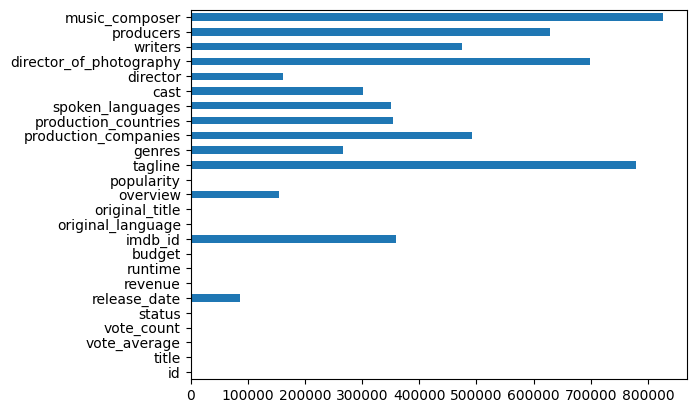

In [15]:
df.isna().sum().plot(kind='barh')

## Imputing Missing Values

The best i can do is to fill msising values with 'Unknown' except the release date column

In [18]:
new_df = df.fillna('Unknown')

In [19]:
new_df.isna().sum()

id                         0
title                      0
vote_average               0
vote_count                 0
status                     0
release_date               0
revenue                    0
runtime                    0
budget                     0
imdb_id                    0
original_language          0
original_title             0
overview                   0
popularity                 0
tagline                    0
genres                     0
production_companies       0
production_countries       0
spoken_languages           0
cast                       0
director                   0
director_of_photography    0
writers                    0
producers                  0
music_composer             0
dtype: int64

In [21]:
new_df[new_df['release_date'] == 'Unknown'].head(10)

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,budget,imdb_id,...,genres,production_companies,production_countries,spoken_languages,cast,director,director_of_photography,writers,producers,music_composer
3965,8089,Decidme cómo es un árbol,0.0,0,Rumored,Unknown,0.0,0,0.0,tt1189315,...,Drama,Unknown,Spain,Español,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
4032,8317,Tonight at Noon,0.0,0,Post Production,Unknown,0.0,0,0.0,tt4032552,...,Drama,Unison Films,United States of America,English,"Connie Nielsen, Lauren Ambrose, Ethan Hawke, J...",Michael Almereyda,Scott Miller,"Michael Almereyda, Jonathan Lethem","Donald Rosenfeld, Emanuel Michael, Bob Gosse, ...",Unknown
4331,8947,Dirty Tricks,10.0,1,Canceled,Unknown,0.0,0,0.0,tt0473472,...,Thriller,Unknown,United States of America,English,Unknown,Unknown,Unknown,John Jeter',Unknown,Unknown
5604,10526,Cancer Vixen: A True Story,0.0,0,Planned,Unknown,0.0,0,0.0,tt3118424,...,Drama,HBO Documentary Films,United States of America,English,Unknown,Unknown,Unknown,Unknown,Tim Bevan,Unknown
7305,12675,The House of Covered Mirrors,0.0,0,In Production,Unknown,0.0,0,0.0,tt1904981,...,Horror,Unknown,Unknown,Unknown,"Andria Smith, Lisa Denise, Christopher Wesley ...",Christopher Wesley Moore,Unknown,Unknown,Unknown,Unknown
7822,13494,Red Sonja,0.0,0,In Production,Unknown,0.0,0,0.0,tt0800175,...,"Action, Adventure, Fantasy","Millennium Media, Cinelou Films",United States of America,English,"Veronica Ferres, Michael Bisping, Trevor Eve, ...",M.J. Bassett,Unknown,"Barry Windsor-Smith, Robert E. Howard, Roy Tho...","Mark Canton, Avi Lerner, Boaz Davidson, Les We...",Unknown
10468,17384,A New Journey: Live at Slane Castle,0.0,0,Released,Unknown,0.0,0,0.0,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
20637,32913,Shiko Mawatu,0.0,0,Released,Unknown,0.0,0,0.0,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
22809,36687,Rootsy Hip,5.2,2,Released,Unknown,0.0,84,0.0,tt1553270,...,"Documentary, Music",Unknown,Unknown,Unknown,"SubjecTmAtTerS, Mob Towne Revival, BlueEyedSou...",Isabel Machado,Unknown,Unknown,Unknown,Unknown
22816,36697,Solen i ögonen,0.0,0,Released,Unknown,0.0,0,0.0,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown


It can be seen that most the columns are also 'Unknown' where release_date is missing so the best option is to drop those rows where release_date is missing.

In [22]:
new_df = new_df[new_df['release_date'] != 'Unknown']